In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL
from scipy.ndimage import rotate

%load_ext autoreload
%autoreload 2

Testing Different Blurs

In [ ]:
image = cv2.imread("publaynet/train/PMC1064098_00000.jpg")

In [ ]:
plt.imshow(image[:,:,::-1])

In [ ]:
cutimage = image[400:600,100:300]
plt.imshow(cutimage[:,:,::-1])

In [ ]:
fig = plt.figure(figsize=(8,8))
for i,j in enumerate(range(1,9,2)):
    gauss = cv2.GaussianBlur(cutimage,(j,j),cv2.BORDER_DEFAULT)
    fig.add_subplot(2,2,i+1)
    plt.imshow(gauss[:,:,::-1])
    plt.title(f"Kernel Size {j}" if j>1 else "Original Image")
plt.show

In [ ]:
fig = plt.figure(figsize=(8,8))
for i,j in enumerate(range(1,9,2)):
    gauss = cv2.blur(cutimage,(j,j))
    fig.add_subplot(2,2,i+1)
    plt.imshow(gauss[:,:,::-1])
    plt.title(f"Kernel Size {j}" if j>1 else "Original Image")
plt.show

In [ ]:
fig = plt.figure(figsize=(8,8))
for i,j in enumerate(range(1,9,2)):
    gauss = cv2.medianBlur(cutimage,3 if j>1 else 1)
    gauss = cv2.GaussianBlur(gauss,(j,j),cv2.BORDER_DEFAULT)
    fig.add_subplot(2,2,i+1)
    plt.imshow(gauss[:,:,::-1])
    plt.title(f"Kernel Size {j}" if j>1 else "Original Image")
plt.show

In [ ]:
fig = plt.figure(figsize=(8,8))
for i,j in enumerate(range(1,14,4)):
    kernel = np.zeros((j, j))
    kernel[j//2, :] = 1
    kernel = kernel / np.sum(kernel)
    random_angle = np.random.randint(0, 180)
    kernel = rotate(kernel, random_angle)
    gauss = cv2.filter2D(cutimage, -1, kernel)
    fig.add_subplot(2,2,i+1)
    plt.imshow(gauss[:,:,::-1])
    plt.title(f"Kernel Size {j}" if j>1 else "Original Image")
plt.show

In [ ]:
h,w = 800,700
img_dim = (400,400)
np.random.randint(h-img_dim[0])

Testing Datasetnew

In [1]:
import cv2
import numpy as np
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms.transforms as TF
from customDataSet import CustomDataset
import pickle
from scipy.ndimage import rotate
doc_dir = "../../publaynet/"
result_dir = "../results/pretrain"
original_dir = os.path.join(result_dir,"original")
blurred_dir = os.path.join(result_dir,"blurred")
restored_dir = os.path.join(result_dir,"restored")

In [2]:
myds = CustomDataset(doc_dir,(256,256),False)
topil = TF.ToPILImage()

size 38942


PMC5427100_00001


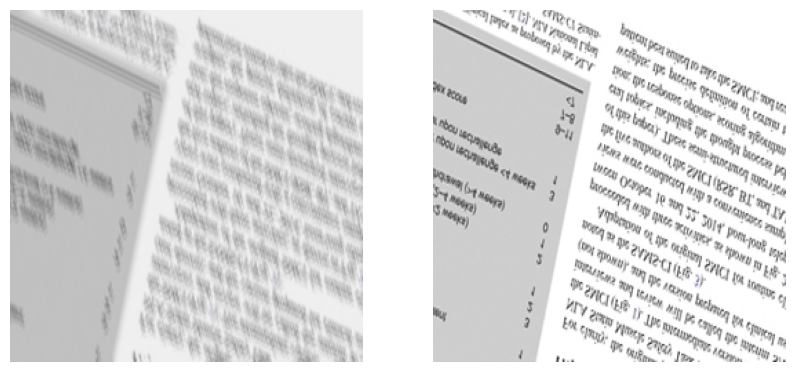

In [7]:
randomx = np.random.randint(47958)
blur,img,filename = myds[randomx]
print(filename)
blur,img = topil(blur),topil(img)
fig = plt.figure(figsize = (10,20))
fig.add_subplot(1,2,1)
plt.imshow(blur)
plt.axis("off")
fig.add_subplot(1,2,2)
plt.imshow(img)
plt.axis("off")
plt.show()

Looking at PSNR

In [ ]:
with open("PSNRs.pkl","rb") as f:
    psnrs = pickle.load(f)
psnrs = pd.Series(psnrs)
psnrs.sort_values(ascending=False,inplace=True)

In [ ]:
psnrs.shape

Looking at Restored Image

In [ ]:
m = "PMC5476474_00019"
blur,img,res = Image.open((os.path.join(blurred_dir, m+'.png'))),Image.open((os.path.join(original_dir, m+'.png'))),Image.open((os.path.join(restored_dir, m+'.png')))
fig = plt.figure(figsize = (20,60))
fig.add_subplot(1,3,1)
plt.imshow(blur)
plt.axis("off")
plt.title('Blur')
fig.add_subplot(1,3,2)
plt.imshow(img)
plt.axis("off")
plt.title('Original')
fig.add_subplot(1,3,3)
plt.imshow(res)
plt.axis("off")
plt.title('Restored')
plt.show()